In [0]:
# import os
# os.chdir("drive/My Drive/placement")

In [129]:
import pandas as pd
import numpy as np
df = pd.read_csv("Placement_Data_Full_Class.csv", index_col="sl_no")
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [0]:
salary = df["salary"]
status = df["status"]


In [131]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [132]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

All NaN Values in salary column are for unemployed entries.

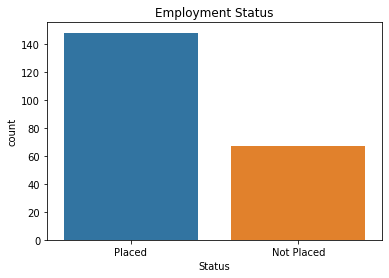

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "status", data = df)
plt.xlabel("Status")
plt.title("Employment Status")
plt.show()

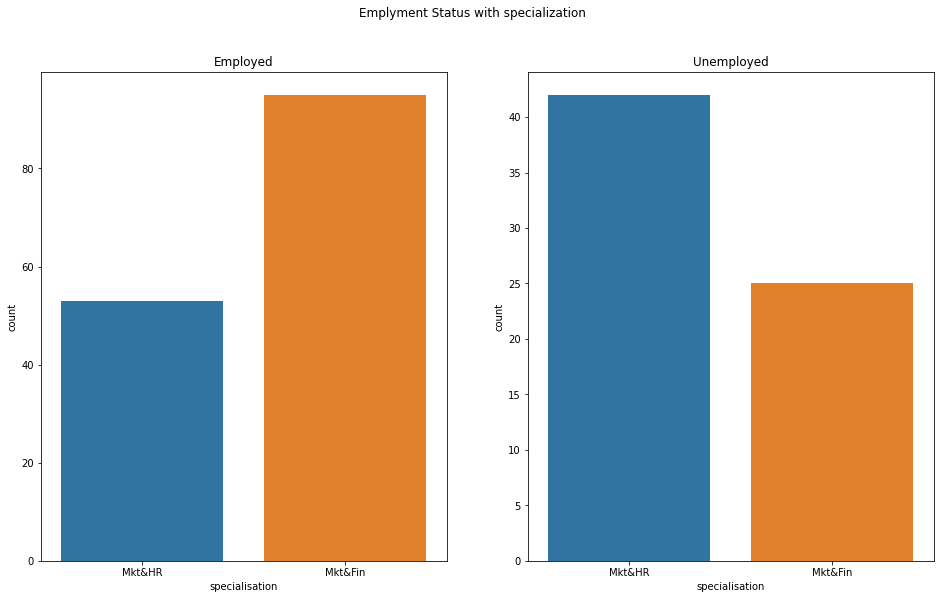

In [134]:
f, axes= plt.subplots(1,2,figsize = (16,9))
sns.countplot(x = "specialisation", data = df[df["status"] == "Placed"], ax = axes[0])
sns.countplot(x = "specialisation", data = df[df["status"] == "Not Placed"], ax = axes[1])
f.suptitle("Emplyment Status with specialization")
axes[0].title.set_text("Employed")
axes[1].title.set_text("Unemployed")


plt.show()

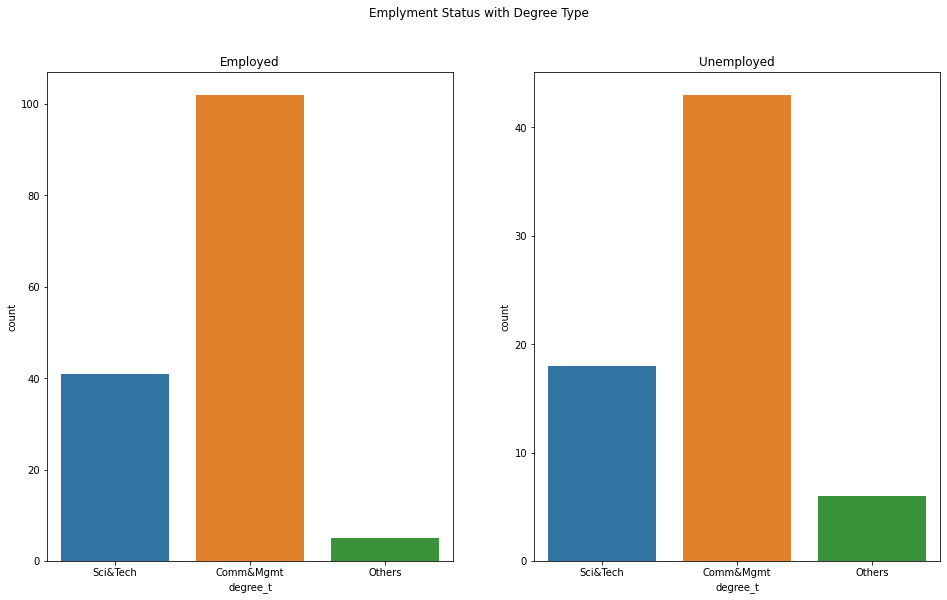

In [135]:
f, axes= plt.subplots(1,2,figsize = (16,9))
sns.countplot(x = "degree_t", data = df[df["status"] == "Placed"], ax = axes[0])
sns.countplot(x = "degree_t", data = df[df["status"] == "Not Placed"], ax = axes[1])
f.suptitle("Emplyment Status with Degree Type")
axes[0].title.set_text("Employed")
axes[1].title.set_text("Unemployed")


plt.show()

Text(0.5, 1.0, 'Salary Distribution')

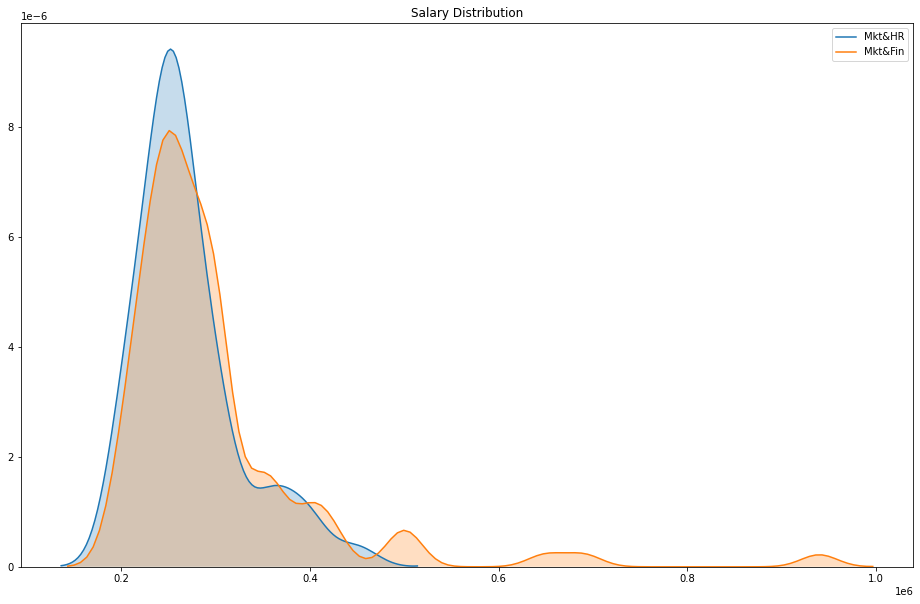

In [136]:
plt.figure(figsize = (16,10))
for i in df["specialisation"].unique():
  sns.kdeplot(data = df[df["specialisation"] == i]['salary'], shade = True, label = i)
plt.title("Salary Distribution")

Text(0.5, 1.0, 'Salary Distribution')

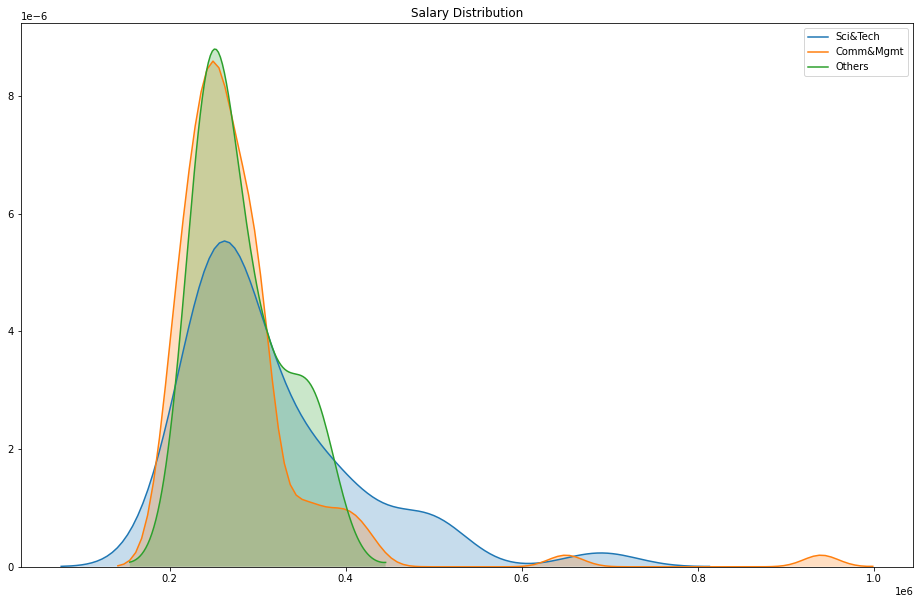

In [137]:
plt.figure(figsize = (16,10))
for i in df["degree_t"].unique():
  sns.kdeplot(data = df[df["degree_t"] == i]['salary'], shade = True, label = i)
plt.title("Salary Distribution")

In [138]:
cols = ['gender', 'ssc_b',  'hsc_b', 'hsc_s','degree_t', 'workex', 'specialisation', 'status',]
for i in cols:
  dummy = pd.get_dummies(df[i], prefix = i)
  df =pd.concat([df, dummy], axis = 1)
  df.drop(columns=[i], inplace= True)
df.head()


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
sl_no,,,,,,,,,,,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1
2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
4,56.00,52.00,52.00,66.0,59.43,NaN,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
5,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1


Text(0.5, 1.0, 'Heatmap of Correlation')

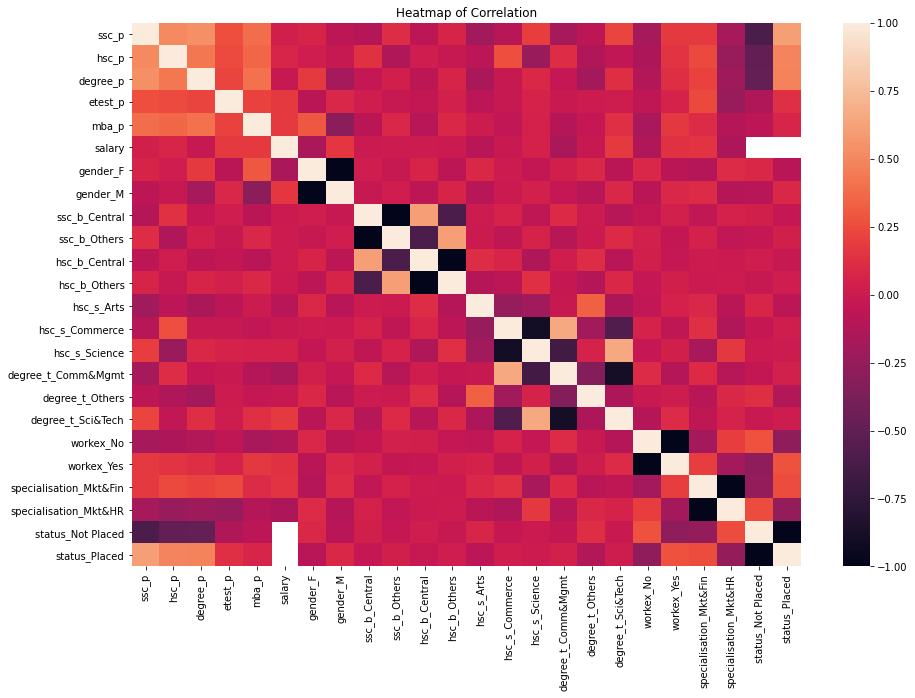

In [139]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df.corr())
plt.title("Heatmap of Correlation")


In [0]:
salary_df = df["salary"]
status_df = df[["status_Not Placed", "status_Placed"]]
df.drop(columns = ["salary"], inplace= True)
df.drop(columns = ["status_Not Placed", "status_Placed"], inplace = True)

In [0]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state= 42 )
for train_index, test_index in skf.split(df.values, status_df["status_Not Placed"]):
  Xtrain = df.values[train_index]
  status_train = status_df["status_Placed"].values[train_index]
  Xtest = df.values[test_index]
  status_test = status_df["status_Placed"].values[test_index]
  break

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
Xtrain = min_max_scaler.fit_transform(Xtrain)
Xtest = min_max_scaler.transform(Xtest)


In [169]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression, SGDRegressor
from sklearn.svm import SVC, LinearSVC, NuSVC
lr = LogisticRegression()
lr.fit(Xtrain, status_train)
print(f"Training Score : {lr.score(Xtrain, status_train)}")
print(f"Test Score : {lr.score(Xtest, status_test)}")


Training Score : 0.9127906976744186
Test Score : 0.8372093023255814


In [144]:
bn = BernoulliNB()
bn.fit(Xtrain, status_train)
print(f"Training Score : {bn.score(Xtrain, status_train)}")
print(f"Test Score : {bn.score(Xtest, status_test)}")

Training Score : 0.7209302325581395
Test Score : 0.5813953488372093


In [145]:
svc = LinearSVC()
svc.fit(Xtrain, status_train)
print(f"Training Score : {svc.score(Xtrain, status_train)}")
print(f"Test Score : {svc.score(Xtest, status_test)}")

Training Score : 0.9069767441860465
Test Score : 0.8372093023255814


In [146]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain, status_train)
print(f"Training Score : {rf.score(Xtrain, status_train)}")
print(f"Test Score : {rf.score(Xtest, status_test)}")

Training Score : 1.0
Test Score : 0.8837209302325582


In [148]:
reduced_df = df[status_df["status_Placed"] == 1]
salary_df = salary_df.dropna()
salary_df.head()

sl_no
1    270000.0
2    200000.0
3    250000.0
5    425000.0
8    252000.0
Name: salary, dtype: float64

In [149]:
reduced_df.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
sl_no,,,,,,,,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.0,58.80,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
2,79.33,78.33,77.48,86.5,66.28,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
3,65.00,68.00,64.00,75.0,57.80,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
5,85.80,73.60,73.30,96.8,55.50,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
8,82.00,64.00,66.00,67.0,62.14,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reduced_df.values, salary_df.values, test_size=0.10, random_state=42)

In [153]:
from sklearn import metrics
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 4541983017.016409


In [170]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 4185752914.7488046


In [171]:
pred_df = pd.DataFrame({"Test":y_test, "Pred":y_pred})
pred_df.head()

,Test,Pred
0,350000.0,282873.719618
1,336000.0,297074.581895
2,260000.0,264036.872658
3,350000.0,309299.760100
4,400000.0,282893.534438


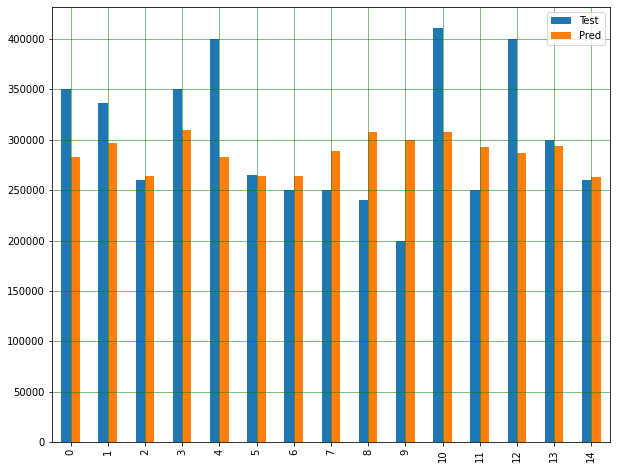

In [174]:
pred_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
def predict_placement(X):
  
  X = min_max_scaler.transform(np.expand_dims(X, axis = 0))
  stat = rf.predict(X)[0] #using random forest here
  if stat > 0.5:
    salary = sgd.predict(X)
    return stat, salary[0]
  else:
    return stat, None

In [182]:

for i in range(27,28):
  stat, salary = predict_placement(df.values[i])
  if stat > 0.5:
    print(f"actual status : {status_df['status_Placed'].values[i]} \npredicted status : {stat} \nactual salary : {salary_df.values[i]} \npredicted salary : {salary}") 
  else :
    print(f"actual status : {status_df['status_Placed'].values[i]} \npredicted status : {stat}")  

actual status : 1 
predicted status : 1 
actual salary : 287000.0 
predicted salary : 31942.394593665074
